In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('Autism_Data_visual.csv')

In [11]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice,Autism,Country,Used_app_before,Result,Age_desc,Relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,F,White-European,No,No,United States,No,6,18 And More,Self,No
1,1,1,0,1,0,0,0,1,0,1,...,M,Latino,No,Yes,Brazil,No,5,18 And More,Self,No
2,1,1,0,1,1,0,1,1,1,1,...,M,Latino,Yes,Yes,Spain,No,8,18 And More,Parent,Yes
3,1,1,0,1,0,0,1,1,0,1,...,F,White-European,No,Yes,United States,No,6,18 And More,Self,No
4,1,0,0,0,0,0,0,1,0,0,...,F,Unknown,No,No,Egypt,No,2,18 And More,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,F,White-European,No,No,Russia,No,7,18 And More,Self,Yes
700,1,0,0,0,0,0,0,1,0,1,...,M,Hispanic,No,No,Mexico,No,3,18 And More,Parent,No
701,1,0,1,1,1,0,1,1,0,1,...,F,Unknown,No,No,Russia,No,7,18 And More,Unknown,Yes
702,1,0,0,1,1,0,1,0,1,1,...,M,South Asian,No,No,Pakistan,No,6,18 And More,Self,No


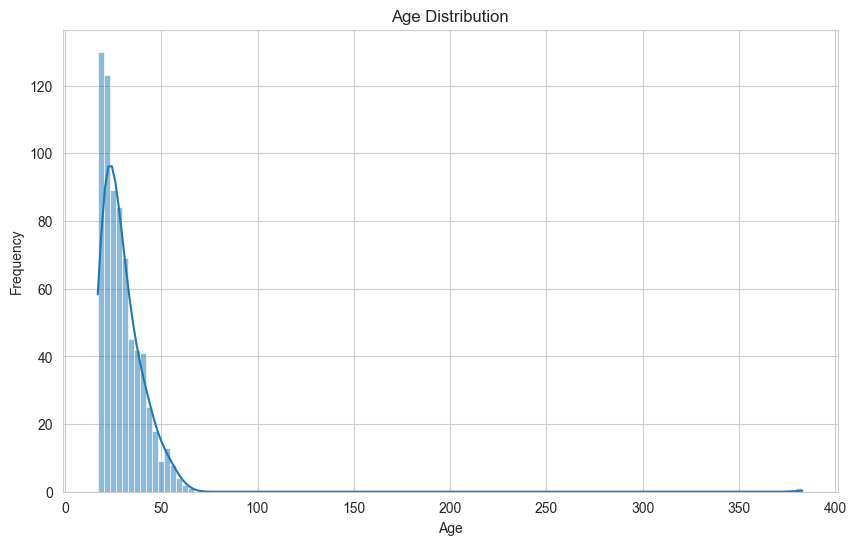

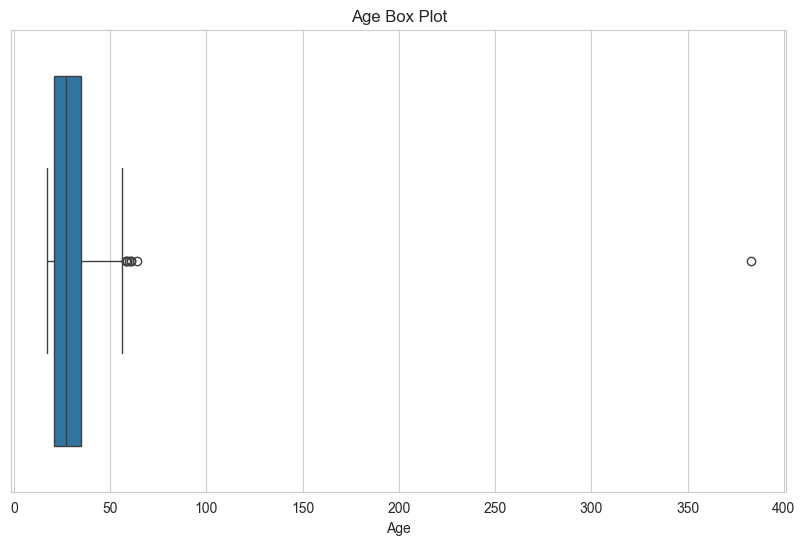

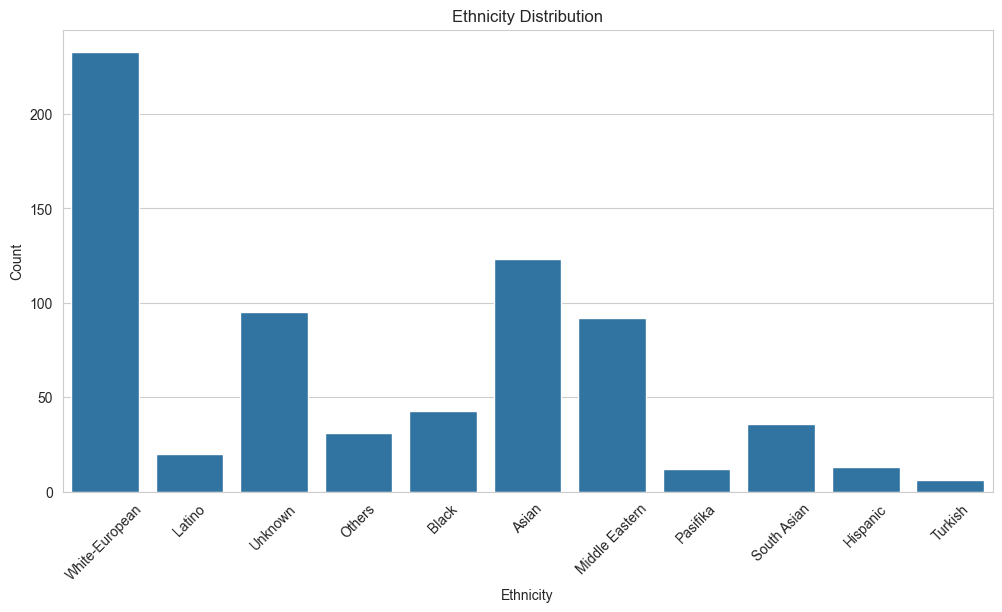

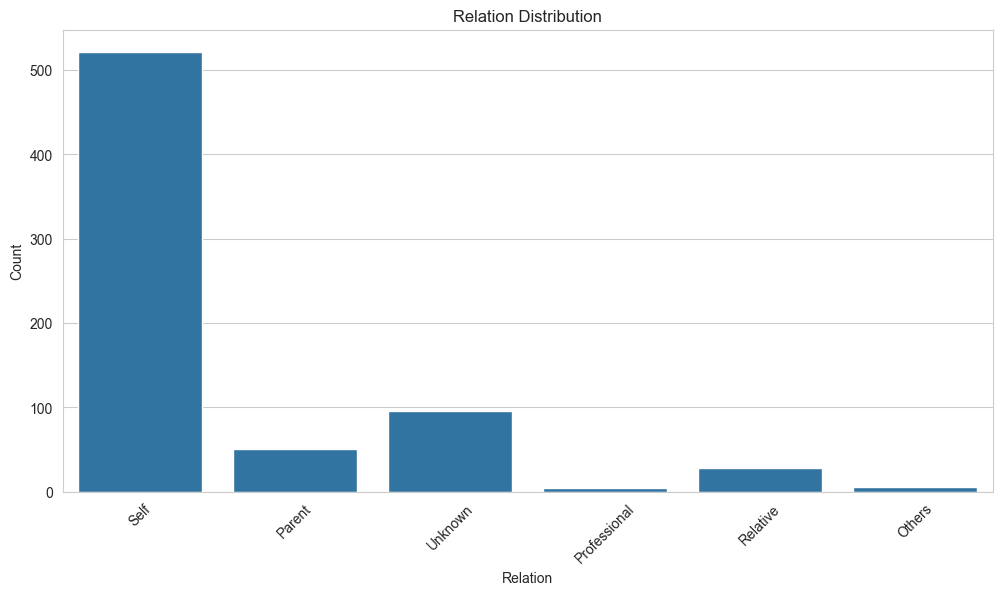

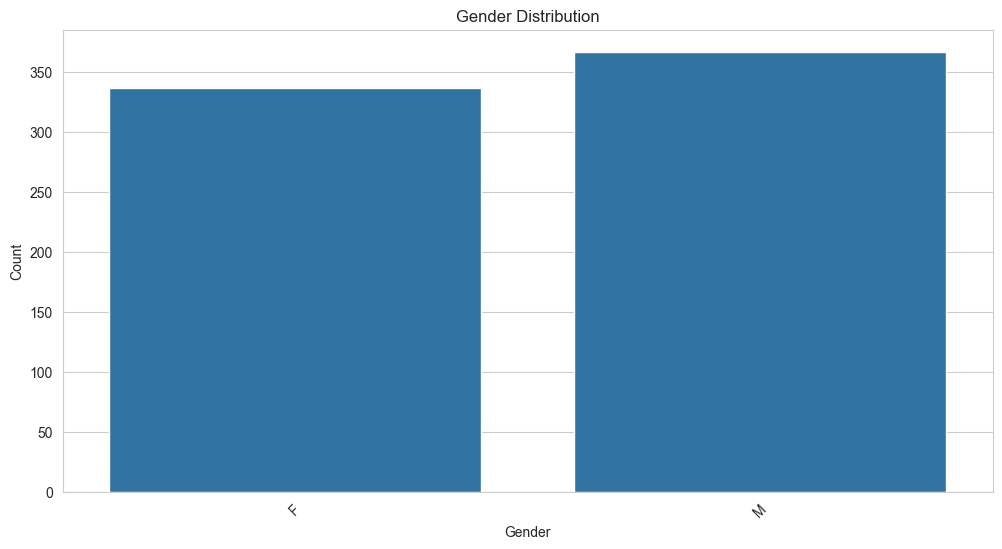

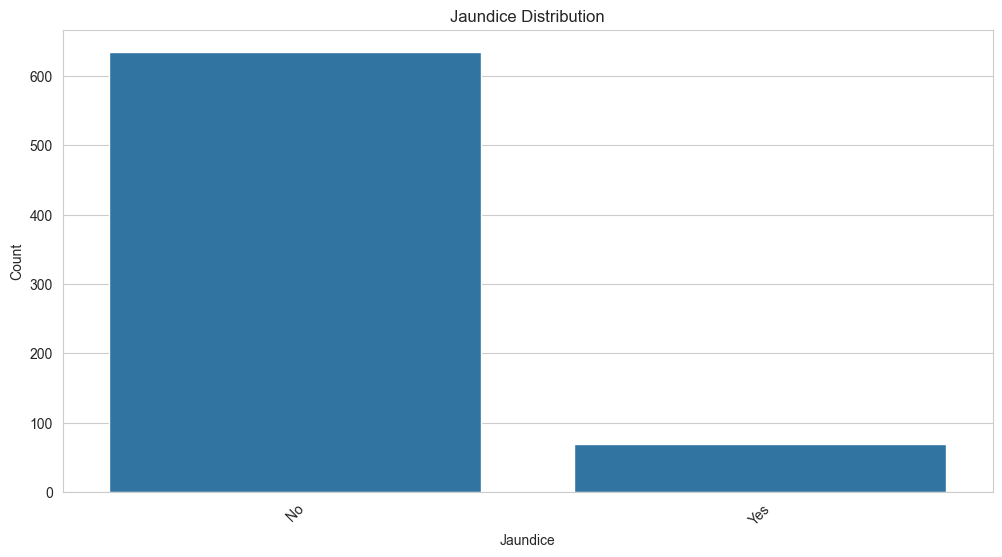

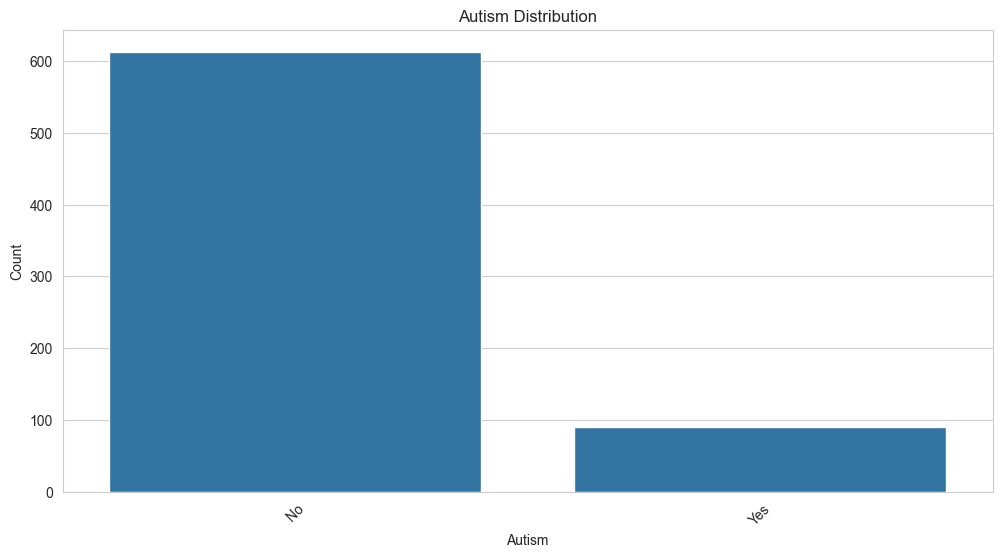

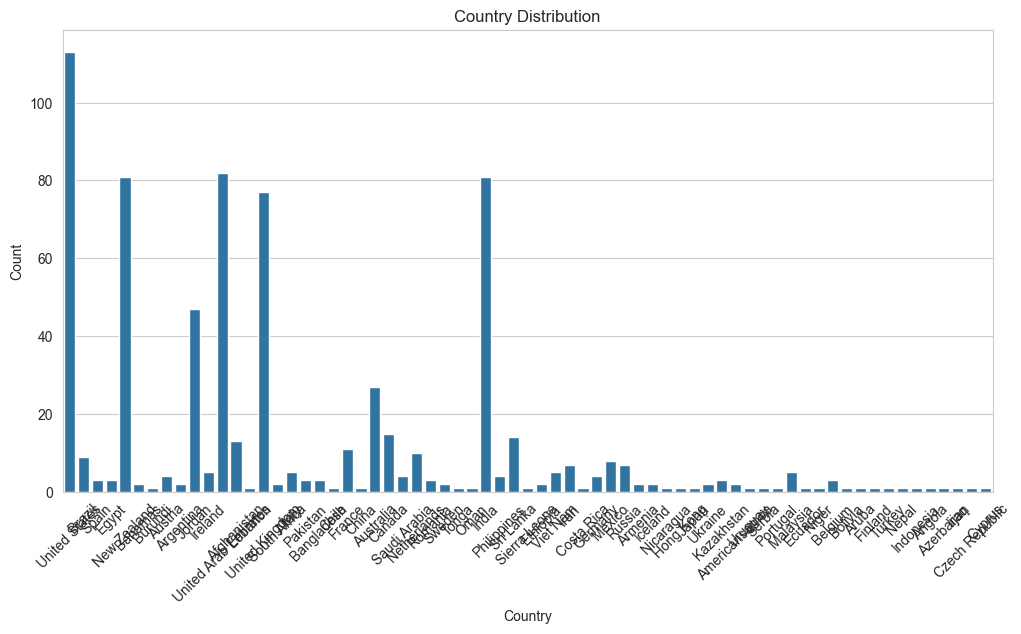

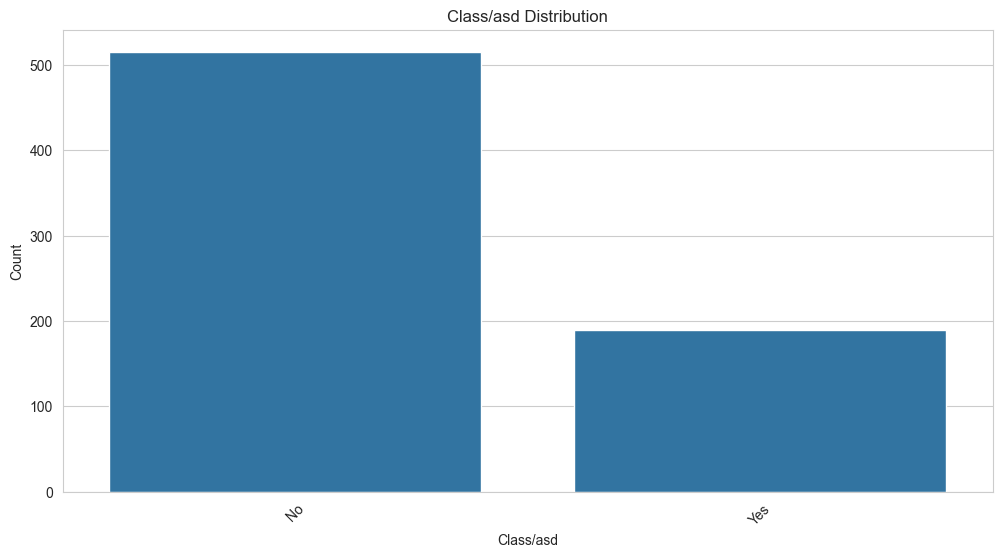

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=data)
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.show()

# Bar plots for categorical features
categorical_columns = ['Ethnicity', 'Relation', 'Gender', 'Jaundice', 'Autism', 'Country',"Class/ASD"]

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [13]:
# Calculate the median of 'Age'
median_Age = data['Age'].median()
print(f"Median of Age: {median_Age}")


Median of Age: 27.0


In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = 5
upper_bound = 85

# Detect outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print(f"Number of outliers in 'Age': {len(outliers)}")
print(outliers['Age'])


Number of outliers in 'Age': 1
52    383.0
Name: Age, dtype: float64


In [15]:
# Replace outliers in 'Age' with the median value
data['Age'] = data['Age'].apply(lambda x: median_Age if x < lower_bound or x > upper_bound else x)

# Verify the replacement
print(data['Age'].describe())

count    704.000000
mean      29.184659
std        9.691837
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: Age, dtype: float64


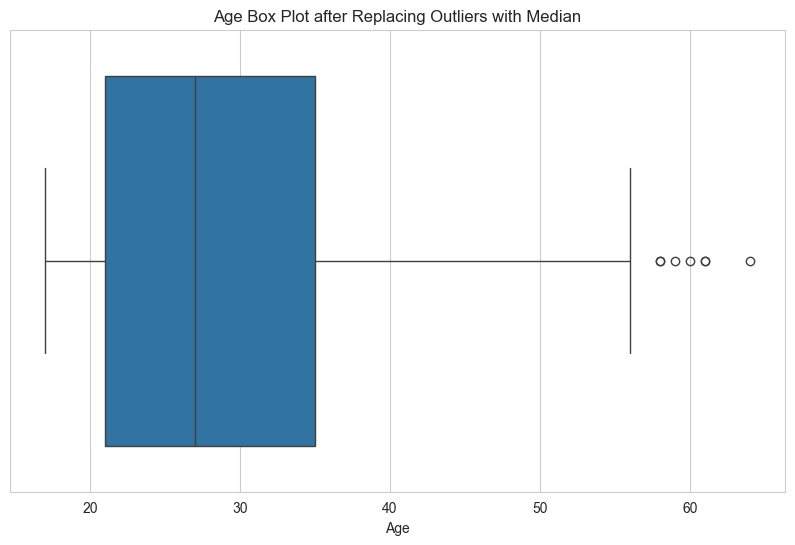

In [16]:
# Box plot for 'Age' after replacing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=data)
plt.title('Age Box Plot after Replacing Outliers with Median')
plt.xlabel('Age')
plt.show()

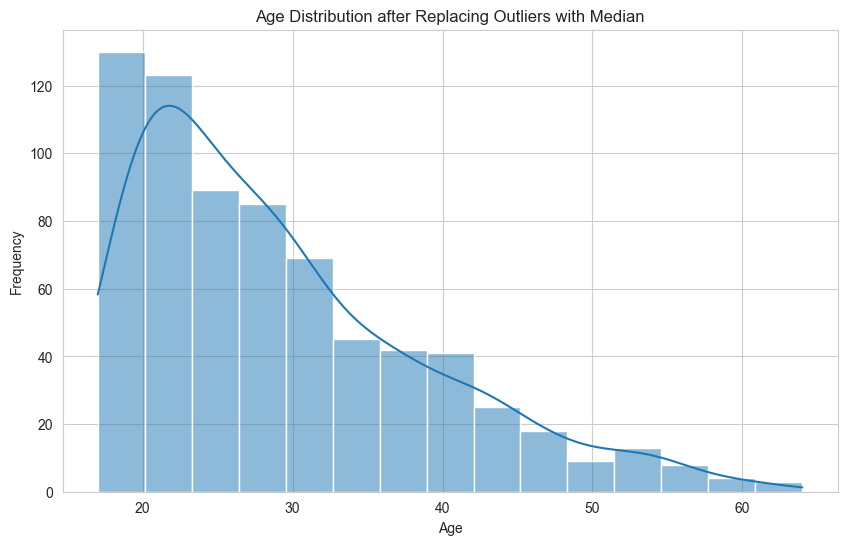

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution after Replacing Outliers with Median')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Display data types of each column to identify non-numeric columns
print(data.dtypes)

# Display unique values in each column to find unexpected non-numeric values
for column in data.columns:
    print(f"Unique values in {column}: {data[column].unique()}")


A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
Age                float64
Gender              object
Ethnicity           object
Jaundice            object
Autism              object
Country             object
Used_app_before     object
Result               int64
Age_desc            object
Relation            object
Class/ASD           object
dtype: object
Unique values in A1_Score: [1 0]
Unique values in A2_Score: [1 0]
Unique values in A3_Score: [1 0]
Unique values in A4_Score: [1 0]
Unique values in A5_Score: [0 1]
Unique values in A6_Score: [0 1]
Unique values in A7_Score: [1 0]
Unique values in A8_Score: [1 0]
Unique values in A9_Score: [0 1]
Unique values in A10_Score: [0 1]
Unique values in Age: [26. 24. 27. 35. 40. 36. 17. 64. 29. 33. 18. 31. 30. 34. 38. 42. 4

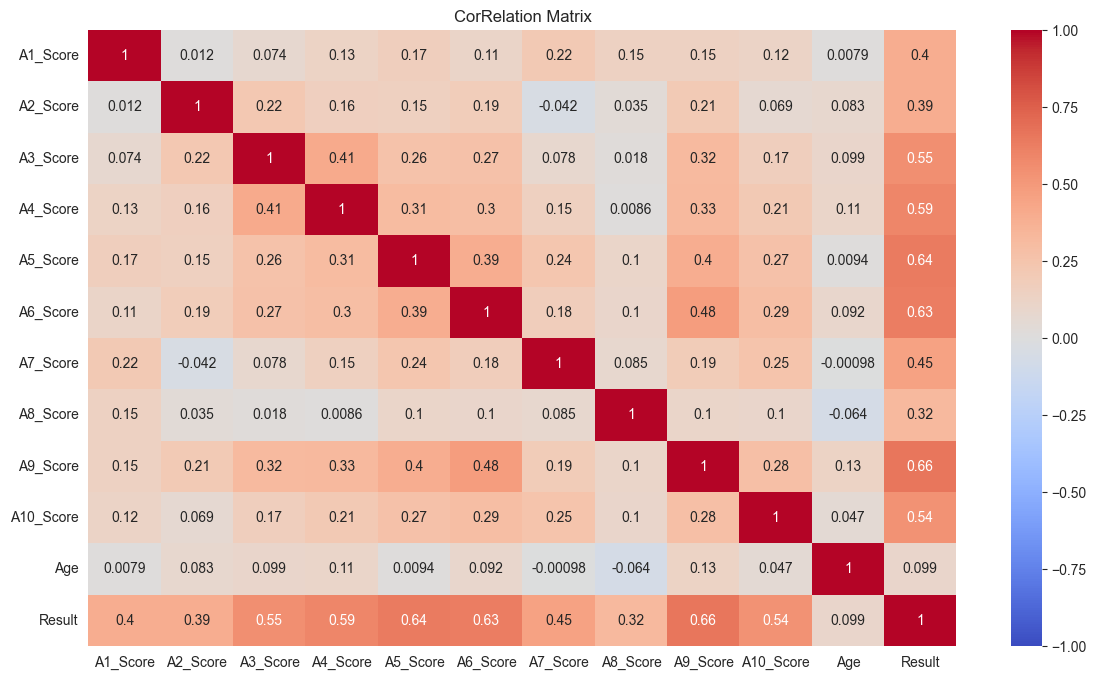

In [19]:
# Compute the corRelation matrix
corRelation_matrix = data.corr(numeric_only=True)

# Heatmap of the corRelation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(corRelation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('CorRelation Matrix')
plt.show()


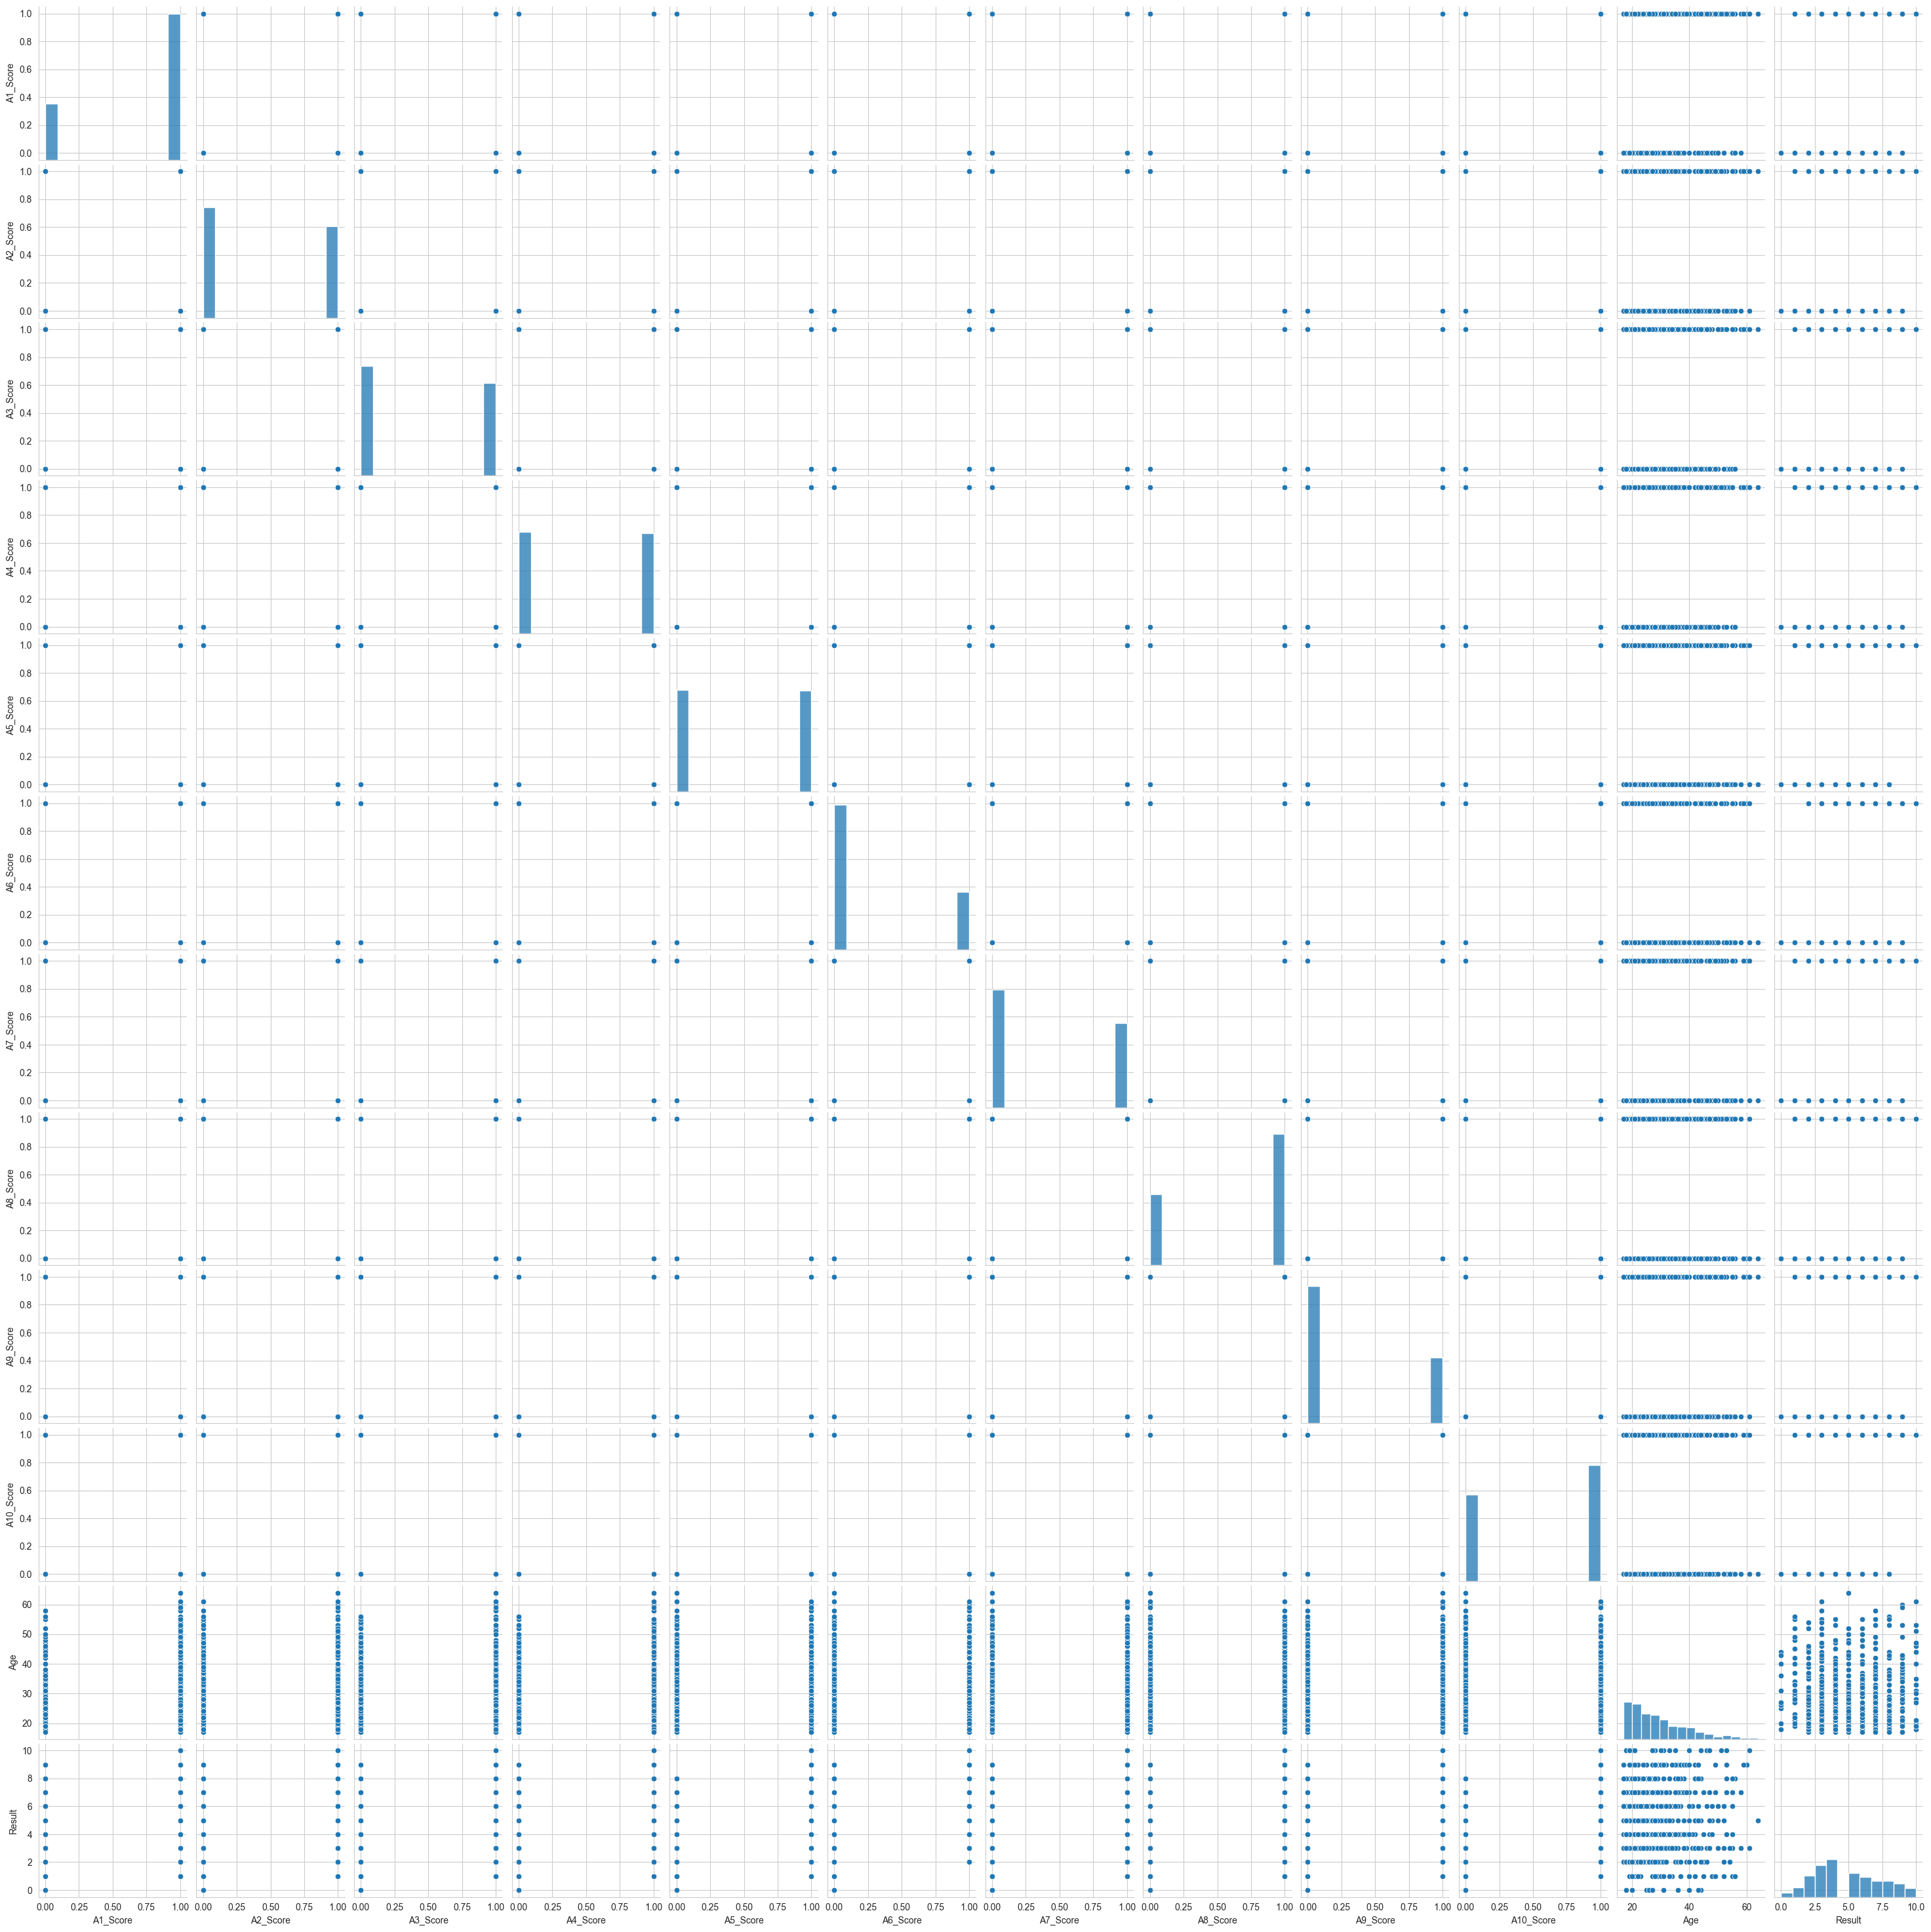

Ethnicity
Asian             27.455285
Black             30.139535
Hispanic          31.846154
Latino            28.550000
Middle Eastern    25.869565
Others            28.645161
Pasifika          25.666667
South Asian       25.777778
Turkish           27.500000
Unknown           26.326316
White-European    33.124464
Name: Age, dtype: float64
Relation
Others          30.400000
Parent          32.800000
Professional    22.250000
Relative        30.000000
Self            29.356322
Unknown         26.326316
Name: Age, dtype: float64
Gender
F    29.516320
M    28.880109
Name: Age, dtype: float64
Jaundice
No     28.776378
Yes    32.942029
Name: Age, dtype: float64
Autism
No     28.505710
Yes    33.758242
Name: Age, dtype: float64
Country
Afghanistan             30.307692
Americansamoa           31.000000
Angola                  18.000000
Argentina               18.500000
Armenia                 29.000000
                          ...    
United Arab Emirates    23.390244
United Kingdom      

In [20]:
# Pair plot to visualize Relationships between features
sns.pairplot(data)
plt.show()

# Groupby and aggregation for categorical features
for column in categorical_columns:
    print(data.groupby(column)['Age'].mean())


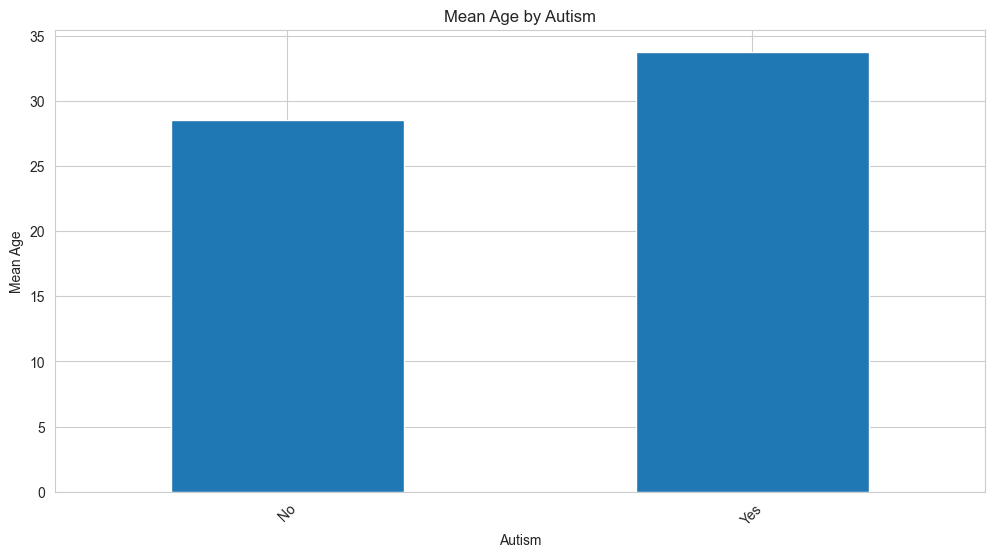

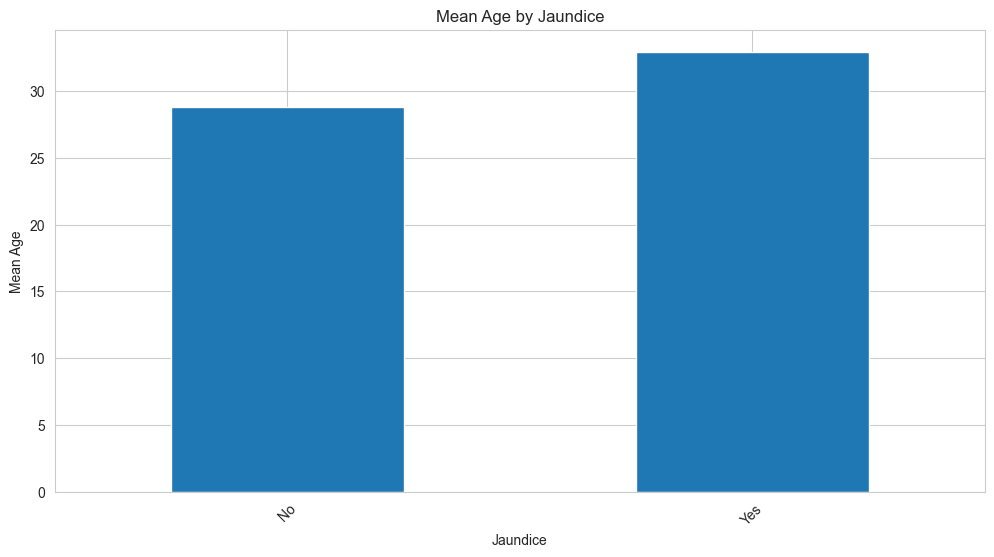

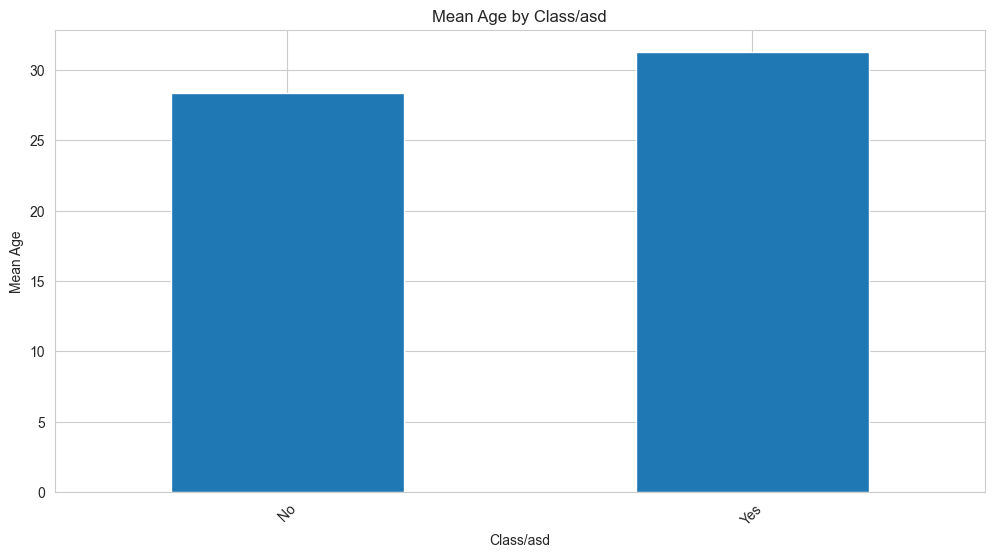

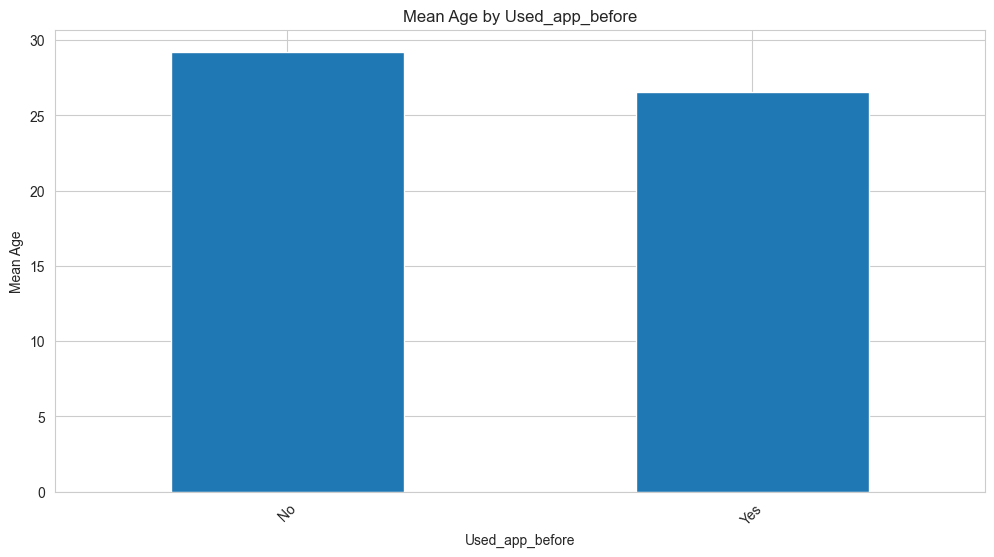

In [22]:
# Bar plots for aggregated data 
columns = ['Autism','Jaundice','Class/ASD','Used_app_before']
for column in columns:
    plt.figure(figsize=(12, 6))
    data.groupby(column)['Age'].mean().plot(kind='bar')
    plt.title(f'Mean Age by {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Mean Age')
    plt.xticks(rotation=45)
    plt.show()
